In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df = pd.read_csv('Housing.csv', index_col=0)

In [4]:
df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [5]:
df.shape

(546, 12)

In [6]:
df.driveway.replace(to_replace=['no', 'yes'], value=[0, 1], inplace=True)
df.recroom.replace(to_replace=['no','yes'], value=[0,1], inplace=True)
df.fullbase.replace(to_replace=['no','yes'], value=[0,1], inplace=True)
df.gashw.replace(to_replace=['no','yes'], value=[0,1], inplace=True)
df.airco.replace(to_replace=['no','yes'], value=[0,1], inplace=True)
df.prefarea.replace(to_replace=['no','yes'], value=[0,1], inplace=True)

In [7]:
Y = df['price']
X = df.drop(['price'], axis=1)

In [8]:
X.head()

,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,5850,3,1,2,1,0,1,0,0,1,0
2,4000,2,1,1,1,0,0,0,0,0,0
3,3060,3,1,1,1,0,0,0,0,0,0
4,6650,3,1,2,1,1,0,0,0,0,0
5,6360,2,1,1,1,0,0,0,0,0,0


In [9]:
Y.head()

1    42000.0
2    38500.0
3    49500.0
4    60500.0
5    61000.0
Name: price, dtype: float64

In [10]:
#Normalising Inputs(2D input)
def normalise(inp):
    return np.array((inp-inp.mean())/inp.std())

In [11]:
Y = np.array(Y)
Y = Y.reshape(Y.shape[0],1)
Y = normalise(Y)

In [12]:
X.shape

(546, 11)

In [13]:
X = normalise(X)

In [14]:
X[:5]

array([[ 0.32273211,  0.04719162, -0.56897304,  0.22150097,  0.40481898,
        -0.4643705 ,  1.36206998, -0.21885329, -0.68040981,  0.35723902,
        -0.55286459],
       [-0.53052646, -1.30894664, -0.56897304, -0.93030406,  0.40481898,
        -0.4643705 , -0.73283202, -0.21885329, -0.68040981, -0.80378779,
        -0.55286459],
       [-0.96407405,  0.04719162, -0.56897304, -0.93030406,  0.40481898,
        -0.4643705 , -0.73283202, -0.21885329, -0.68040981, -0.80378779,
        -0.55286459],
       [ 0.69170878,  0.04719162, -0.56897304,  0.22150097,  0.40481898,
         2.14950883, -0.73283202, -0.21885329, -0.68040981, -0.80378779,
        -0.55286459],
       [ 0.55795474, -1.30894664, -0.56897304, -0.93030406,  0.40481898,
        -0.4643705 , -0.73283202, -0.21885329, -0.68040981, -0.80378779,
        -0.55286459]])

In [15]:
Y[:5]

array([[-0.97913617],
       [-1.11032939],
       [-0.69800783],
       [-0.28568626],
       [-0.26694437]])

In [16]:
X = np.c_[np.ones(X.shape[0]),np.array(X)]

In [17]:
X[5]

array([ 1.        , -0.45673112,  0.04719162, -0.56897304, -0.93030406,
        0.40481898,  2.14950883,  1.36206998, -0.21885329,  1.46701074,
       -0.80378779, -0.55286459])

In [18]:
X.shape

(546, 12)

In [19]:
theta = np.random.randn(12,1)
np.random.seed(2)
print("Theta:", theta)

Theta: [[ 3.0825456 ]
 [ 0.67910699]
 [ 0.1574648 ]
 [-0.37421674]
 [ 0.51805763]
 [ 0.44079816]
 [ 0.62895482]
 [ 0.01413197]
 [ 0.99209425]
 [ 1.22787922]
 [ 0.10556027]
 [ 0.03346393]]


In [21]:
#Calculating Cost
cost = lambda X,Y,theta : 1/(2*X.shape[0])*np.sum(np.square(np.dot(X,theta)-Y))

In [23]:
#Computing derivative
derivative = lambda X,Y,theta : 1/X.shape[0]*np.dot(X.transpose(),(np.dot(X,theta)-Y))

In [24]:
cost(X,Y,theta)

6.308808913119252

In [25]:
#Trying different learning rates
learning_rates = [0.1,0.01,0.001]

In [26]:
iterations=10000
costs = []
def gradientDescent(X,Y,theta,iterations,learning_rate):
    nexamples = X.shape[0]
    for i in range(iterations):
        computed_cost = cost(X,Y,theta)
        if i%1000==0:
            print("Cost after iteration "+str(i+1)+":",computed_cost)
#         print(X.shape)
#         print(theta.shape)
#         print(Y.shape)
        dtheta = derivative(X,Y,theta)
        theta = theta-learning_rate*dtheta
        costs.append(computed_cost)                   
    return costs                                                      

In [27]:
costs = gradientDescent(X,Y,theta,iterations,0.01)

Cost after iteration 1: 6.308808913119252
Cost after iteration 1001: 0.16344033418651394
Cost after iteration 2001: 0.16343818998631007
Cost after iteration 3001: 0.1634381896793502
Cost after iteration 4001: 0.16343818967927476
Cost after iteration 5001: 0.1634381896792747
Cost after iteration 6001: 0.16343818967927476
Cost after iteration 7001: 0.16343818967927473
Cost after iteration 8001: 0.16343818967927473
Cost after iteration 9001: 0.16343818967927473


Text(0, 0.5, 'Cost')

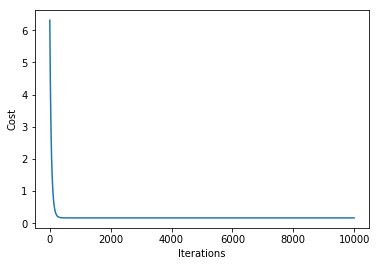

In [28]:
plt.plot(range(iterations),costs)
plt.xlabel("Iterations")
plt.ylabel("Cost")

# Using Regularization

In [26]:
theta = np.random.randn(12,1)
print("Theta:", theta)

Theta: [[-0.41675785]
 [-0.05626683]
 [-2.1361961 ]
 [ 1.64027081]
 [-1.79343559]
 [-0.84174737]
 [ 0.50288142]
 [-1.24528809]
 [-1.05795222]
 [-0.90900761]
 [ 0.55145404]
 [ 2.29220801]]


In [27]:
#Calculating Cost
cost = lambda X,Y,theta,lambd : 1/(2*X.shape[0])*(np.sum(np.square(np.matmul(X,theta)-Y))+lambd*np.sum(theta**2))

In [28]:
#Computing derivative
derivative = lambda X,Y,theta: 1/X.shape[0]*(np.matmul(X.T,(np.matmul(X,theta)-Y)))

In [29]:
cost(X,Y,theta,lambd=500)

18.754662684944453

In [30]:
iterations=10000
costs = []
def gradientDescentwithReg(X,Y,theta,lambd,iterations,learning_rate):
    nexamples = X.shape[0]
    for i in range(iterations):
        computed_cost = cost(X,Y,theta,lambd)
        if i%1000==0:
            print("Cost after iteration "+str(i+1)+":",computed_cost)
#         print(X.shape)
#         print(theta.shape)
#         print(Y.shape)
        dtheta = derivative(X,Y,theta)
        theta = theta*(1-learning_rate*lambd/nexamples)-learning_rate*dtheta
        costs.append(computed_cost)                   
    return costs                                                      

In [31]:
costs = gradientDescentwithReg(X,Y,theta,1000,iterations,0.001)

Cost after iteration 1: 28.215804619984056
Cost after iteration 1001: 0.4760688002456511
Cost after iteration 2001: 0.3172026217795923
Cost after iteration 3001: 0.3160521435329417
Cost after iteration 4001: 0.3160432413888741
Cost after iteration 5001: 0.3160431697624914
Cost after iteration 6001: 0.31604316916590597
Cost after iteration 7001: 0.3160431691607614
Cost after iteration 8001: 0.3160431691607155
Cost after iteration 9001: 0.3160431691607151


10000


Text(0,0.5,'Cost')

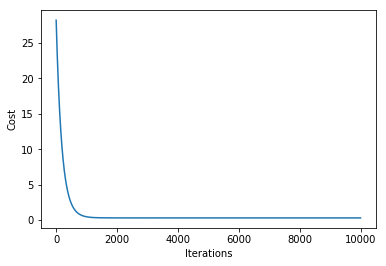

In [32]:
print(len(costs))
plt.plot(range(iterations),costs)
plt.xlabel("Iterations")
plt.ylabel("Cost")

# Trying different values of lambda and learning rate

In [37]:
lambda_plus_learning_rate = [(0,0.1),(0,0.01),(0,0.001),(500,0.1),(500,0.01),(500,0.001),(1000,0.1),(1000,0.01),(1000,0.001),(1500,0.1),(1500,0.01),(1500,0.001)]

In [38]:
for lambd, learning_rate in lambda_plus_learning_rate:
    print("Costs for lambda and learning rate:"+str(lambd)+" and "+str(learning_rate))
    costs = gradientDescentwithReg(X,Y,theta,lambd,iterations,learning_rate)

Costs for lambda and learning rate:0 and 0.1
Cost after iteration 1: 9.293520749904848
Cost after iteration 1001: 0.16343818967927473
Cost after iteration 2001: 0.16343818967927473
Cost after iteration 3001: 0.16343818967927473
Cost after iteration 4001: 0.16343818967927473
Cost after iteration 5001: 0.16343818967927473
Cost after iteration 6001: 0.16343818967927473
Cost after iteration 7001: 0.16343818967927473
Cost after iteration 8001: 0.16343818967927473
Cost after iteration 9001: 0.16343818967927473
Costs for lambda and learning rate:0 and 0.01
Cost after iteration 1: 9.293520749904848
Cost after iteration 1001: 0.1635152547555512
Cost after iteration 2001: 0.1634382030000698
Cost after iteration 3001: 0.16343818968256218
Cost after iteration 4001: 0.16343818967927556
Cost after iteration 5001: 0.16343818967927473
Cost after iteration 6001: 0.16343818967927476
Cost after iteration 7001: 0.1634381896792747
Cost after iteration 8001: 0.16343818967927473
Cost after iteration 9001: 0.